In [98]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup

In [315]:
url = 'https://www.themoviedb.org/movie?page='

header = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36'}

response = requests.get(url, headers = header)

In [316]:
response

<Response [200]>

In [317]:
content=response.text
print(content)

<!DOCTYPE html>
<html lang="en" class="no-js">
  <head>
    <title>Popular Movies &#8212; The Movie Database (TMDB)</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge" />
    <meta http-equiv="cleartype" content="on">
    <meta charset="utf-8">
    
    <meta name="keywords" content="Movies, TV Shows, Streaming, Reviews, API, Actors, Actresses, Photos, User Ratings, Synopsis, Trailers, Teasers, Credits, Cast">
    <meta name="mobile-web-app-capable" content="yes">
    <meta name="apple-mobile-web-app-capable" content="yes">
    <meta name="viewport" content="width=device-width,initial-scale=1">
    
      <meta name="description" content="The Movie Database (TMDB) is a popular, user editable database for movies and TV shows.">
    
    <meta name="msapplication-TileImage" content="/assets/2/v4/icons/mstile-144x144-30e7905a8315a080978ad6aeb71c69222b72c2f75d26dab1224173a96fecc962.png">
<meta name="msapplication-TileColor" content="#032541">
<meta name="theme-color" content="

In [318]:
soup = BeautifulSoup(content,'lxml')

In [319]:
movie_url= soup.find('div',class_='card style_1').a['href']
movie_url='https://www.themoviedb.org' + movie_url
movie_name = soup.find('div',class_='card style_1').a['title']
movie_rating = soup.find('div',class_='user_score_chart' )['data-percent']
url2 = requests.get(movie_url, headers = header)
mo_url= BeautifulSoup(url2.text,'lxml')
mo_url
movie_release = mo_url.find('span',class_='release').text.strip()
movie_genres =mo_url.find('span',class_='genres').text.strip().replace('\xa0',' ')
runtime = mo_url.find('span',class_='runtime').text.strip()
print(movie_release)
print(movie_genres)
print(runtime)
print(movie_url)
print(movie_name)
print(movie_rating)

03/04/2022 (IN)
Crime, Mystery, Thriller
2h 56m
https://www.themoviedb.org/movie/414906
The Batman
79.0


In [9]:
all_movie = []
amp = soup.find_all('div',class_='card style_1')
for item in amp:
    movie_name = item.find('div',class_="content").h2.text
    movie_rating = item.find('div',class_="user_score_chart")['data-percent']
    movie_link= item.find('div',class_="content").a['href']
    movie_link= "https://www.themoviedb.org"+movie_link
    url2 = requests.get(movie_link, headers = {'User-Agent':'Chrome/99.0.4844.51'})
    mo_url= BeautifulSoup(url2.text,'lxml')
    movie_release = mo_url.find('span',class_="release").text.strip().replace('(US)',' ').replace('(IN)',' ').replace('(CZ)',' ').replace('(FR)',' ').replace('(GB)',' ').replace('(KR)',' ').replace('(AU)',' ').replace('(DE)',' ')
    movie_genres = mo_url.find('span',class_="genres").text.strip().replace('\xa0',' ')
    runtime = mo_url.find('span',class_="runtime").text.strip()
    
    director=mo_url.find('li',class_='profile').a.text
    mymv = {
        'movie name' :movie_name,
        'movie review' :movie_rating,
        'movie link' :movie_link,
        'Genre' : movie_genres,
        'Release Date' : movie_release,
        'Runtime' : runtime,
        'Director' : director,
    }
    
    all_movie.append(mymv)
print(all_movie)

[{'movie name': 'The Batman', 'movie review': '79.0', 'movie link': 'https://www.themoviedb.org/movie/414906', 'Genre': 'Crime, Mystery, Thriller', 'Release Date': '03/04/2022 (IN)', 'Runtime': '2h 56m', 'Director': 'Matt Reeves'}, {'movie name': 'Spider-Man: No Way Home', 'movie review': '82.0', 'movie link': 'https://www.themoviedb.org/movie/634649', 'Genre': 'Action, Adventure, Science Fiction', 'Release Date': '12/17/2021 (IN)', 'Runtime': '2h 28m', 'Director': 'Steve Ditko'}, {'movie name': 'Turning Red', 'movie review': '75.0', 'movie link': 'https://www.themoviedb.org/movie/508947', 'Genre': 'Animation, Family, Comedy, Fantasy', 'Release Date': '03/10/2022 (CZ)', 'Runtime': '1h 40m', 'Director': 'Domee Shi'}, {'movie name': 'Sonic the Hedgehog 2', 'movie review': '77.0', 'movie link': 'https://www.themoviedb.org/movie/675353', 'Genre': 'Action, Science Fiction, Comedy, Family', 'Release Date': '04/08/2022 (US)', 'Runtime': '2h 2m', 'Director': 'Patrick Casey'}, {'movie name': 'W

In [10]:
df = pd.DataFrame(all_movie)
df

,movie name,movie review,movie link,Genre,Release Date,Runtime,Director
0,The Batman,79.0,https://www.themoviedb.org/movie/414906,"Crime, Mystery, Thriller",03/04/2022 (IN),2h 56m,Matt Reeves
1,Spider-Man: No Way Home,82.0,https://www.themoviedb.org/movie/634649,"Action, Adventure, Science Fiction",12/17/2021 (IN),2h 28m,Steve Ditko
2,Turning Red,75.0,https://www.themoviedb.org/movie/508947,"Animation, Family, Comedy, Fantasy",03/10/2022 (CZ),1h 40m,Domee Shi
3,Sonic the Hedgehog 2,77.0,https://www.themoviedb.org/movie/675353,"Action, Science Fiction, Comedy, Family",04/08/2022 (US),2h 2m,Patrick Casey
4,War of the Worlds: Annihilation,61.0,https://www.themoviedb.org/movie/919689,"Science Fiction, Action",12/22/2021 (US),1h 53m,Maximilian Elfeldt
5,All the Old Knives,60,https://www.themoviedb.org/movie/294793,"Thriller, Action",04/08/2022 (GB),1h 42m,Olen Steinhauer
6,Moonfall,65.0,https://www.themoviedb.org/movie/406759,"Action, Adventure, Science Fiction",02/04/2022 (US),2h 10m,Roland Emmerich
7,Yaksha: Ruthless Operations,62.0,https://www.themoviedb.org/movie/606402,Action,04/08/2022 (KR),2h 5m,Na Hyun
8,The Outfit,71.0,https://www.themoviedb.org/movie/799876,"Drama, Thriller, Crime",03/18/2022 (US),1h 45m,Graham Moore
9,Encanto,77.0,https://www.themoviedb.org/movie/568124,"Animation, Comedy, Family, Fantasy",11/24/2021 (US),1h 42m,Charise Castro Smith


In [95]:
allmovies='https://www.themoviedb.org/movie?page='

In [96]:
lst_url = []
for values in range(1,201):
    lst_url.append(allmovies+str(values))

In [97]:

for val in lst_url:
    print(val)    

https://www.themoviedb.org/movie?page=1
https://www.themoviedb.org/movie?page=2
https://www.themoviedb.org/movie?page=3
https://www.themoviedb.org/movie?page=4
https://www.themoviedb.org/movie?page=5
https://www.themoviedb.org/movie?page=6
https://www.themoviedb.org/movie?page=7
https://www.themoviedb.org/movie?page=8
https://www.themoviedb.org/movie?page=9
https://www.themoviedb.org/movie?page=10
https://www.themoviedb.org/movie?page=11
https://www.themoviedb.org/movie?page=12
https://www.themoviedb.org/movie?page=13
https://www.themoviedb.org/movie?page=14
https://www.themoviedb.org/movie?page=15
https://www.themoviedb.org/movie?page=16
https://www.themoviedb.org/movie?page=17
https://www.themoviedb.org/movie?page=18
https://www.themoviedb.org/movie?page=19
https://www.themoviedb.org/movie?page=20
https://www.themoviedb.org/movie?page=21
https://www.themoviedb.org/movie?page=22
https://www.themoviedb.org/movie?page=23
https://www.themoviedb.org/movie?page=24
https://www.themoviedb.or

In [100]:
ldt = []
def almv():
    for link in lst_url:
        response = requests.get(link, headers= {'User-Agent':'Chrome/99.0.4844.51'})
        html_text = response.text
        movies_soup = BeautifulSoup(html_text,'lxml')
        allsoup=movies_soup.find_all('div',class_='card style_1')
        for item in allsoup:
            movie_name = item.find('div',class_='content').h2.text
            movie_rating = item.find('div',class_='user_score_chart')['data-percent']
            movie_link= item.find('div',class_='content').a['href']
            movie_link= 'https://www.themoviedb.org'+movie_link
            url2 = requests.get(movie_link, headers = {'User-Agent':'Chrome/99.0.4844.51'})
            mo_url= BeautifulSoup(url2.text,'lxml')
            mo_url
            movie_release = mo_url.find('span',class_='release').text.strip().replace('(US)',' ').replace('(IN)',' ').replace('(CZ)',' ').replace('(FR)',' ').replace('(GB)',' ').replace('(KR)',' ').replace('(AU)',' ').replace('(DE)',' ').replace('(RU)',' ').replace('(CA)',' ').replace('(JP)',' ').replace('(IT)',' ').replace('(AR)',' ').replace('(NL)',' ').replace('(CL)',' ').replace('(PE)',' ').replace('(BR)',' ').replace('(MX)',' ').replace('(HK)',' ').replace('(IE)',' ').replace('(UA)',' ').replace('(CN)',' ').replace('(CO)',' ').replace('(TW)',' ').replace('(CH)',' ').replace('(NZ)',' ').replace('(TR)',' ').replace('(HU)',' ').replace('(SG)',' ').replace('(TH)',' ').replace('(AE)',' ').replace('(PT)',' ').replace('(NO)',' ').replace('(EC)',' ').replace('(FI)',' ').replace('(GR)',' ').replace('(ID)',' ').replace('(VN)',' ').replace('(PL)',' ').replace('(LV)',' ').replace('(DK)',' ').replace('(NG)',' ').replace('(SE)',' ').replace('(AT)',' ').replace('(ES)',' ').replace('(MU)',' ').replace('(IS)',' ').replace('(PH)',' ').replace('(SU)',' ').replace('(RO)',' ').replace('(PR)',' ').replace('(BE)',' ').replace('(ZA)',' ').replace('(IL)',' ').replace('(DO)',' ').strip()
            movie_genres = mo_url.find('span',class_='genres').text.strip().replace('\xa0',' ')
            runtime = mo_url.find('span',class_='runtime')
            if runtime is not None:
                runtime=(runtime.text.strip())
            director=mo_url.find('li',class_='profile')
            if director is not None:
                director=(director.p.text)
            my_movies = {
                "Name" : movie_name,
                "Rating" : movie_rating,
                "Genre" : movie_genres,
                "Release Date" : movie_release,
                "Runtime" : runtime,
                "Director" : director,
                "Url" : movie_link
            }
            ldt.append(my_movies)
almv()

In [101]:
print(ldt)

[{'Name': 'The Batman', 'Rating': '79.0', 'Genre': 'Crime, Mystery, Thriller', 'Release Date': '03/04/2022', 'Runtime': '2h 56m', 'Director': 'Matt Reeves', 'Url': 'https://www.themoviedb.org/movie/414906'}, {'Name': 'Spider-Man: No Way Home', 'Rating': '81.0', 'Genre': 'Action, Adventure, Science Fiction', 'Release Date': '12/17/2021', 'Runtime': '2h 28m', 'Director': 'Steve Ditko', 'Url': 'https://www.themoviedb.org/movie/634649'}, {'Name': 'The Outfit', 'Rating': '70', 'Genre': 'Drama, Thriller, Crime', 'Release Date': '03/18/2022', 'Runtime': '1h 45m', 'Director': 'Graham Moore', 'Url': 'https://www.themoviedb.org/movie/799876'}, {'Name': 'Turning Red', 'Rating': '75.0', 'Genre': 'Animation, Family, Comedy, Fantasy', 'Release Date': '03/10/2022', 'Runtime': '1h 40m', 'Director': 'Domee Shi', 'Url': 'https://www.themoviedb.org/movie/508947'}, {'Name': 'Yaksha: Ruthless Operations', 'Rating': '60', 'Genre': 'Action', 'Release Date': '04/08/2022', 'Runtime': '2h 5m', 'Director': 'Na H

In [105]:
all_200_movie_pages= pd.DataFrame(ldt)
all_200_movie_pages

,Name,Rating,Genre,Release Date,Runtime,Director,Url
0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906
1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko,https://www.themoviedb.org/movie/634649
2,The Outfit,70,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore,https://www.themoviedb.org/movie/799876
3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947
4,Yaksha: Ruthless Operations,60,Action,04/08/2022,2h 5m,Na Hyun,https://www.themoviedb.org/movie/606402
...,...,...,...,...,...,...,...
3995,The Girl on the Train,59.0,"Drama, Thriller",02/26/2021,2h 8m,Ribhu Dasgupta,https://www.themoviedb.org/movie/695958
3996,Don't Be Afraid of the Dark,57.0,"Fantasy, Horror, Thriller",08/25/2011,1h 39m,Troy Nixey,https://www.themoviedb.org/movie/46261
3997,Fantastic Mr. Fox,78.0,"Adventure, Animation, Comedy, Family",11/25/2009,1h 27m,Wes Anderson,https://www.themoviedb.org/movie/10315
3998,Kin,62.0,"Science Fiction, Action",08/31/2018,1h 42m,Josh Baker,https://www.themoviedb.org/movie/425505


In [106]:
all_200_movie_pages.to_csv("Web Scraping of movie pages2.csv")

In [107]:
data=pd.read_csv("Web Scraping of movie pages2.csv")
data

,Unnamed: 0,Name,Rating,Genre,Release Date,Runtime,Director,Url
0,0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906
1,1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko,https://www.themoviedb.org/movie/634649
2,2,The Outfit,70.0,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore,https://www.themoviedb.org/movie/799876
3,3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947
4,4,Yaksha: Ruthless Operations,60.0,Action,04/08/2022,2h 5m,Na Hyun,https://www.themoviedb.org/movie/606402
...,...,...,...,...,...,...,...,...
3995,3995,The Girl on the Train,59.0,"Drama, Thriller",02/26/2021,2h 8m,Ribhu Dasgupta,https://www.themoviedb.org/movie/695958
3996,3996,Don't Be Afraid of the Dark,57.0,"Fantasy, Horror, Thriller",08/25/2011,1h 39m,Troy Nixey,https://www.themoviedb.org/movie/46261
3997,3997,Fantastic Mr. Fox,78.0,"Adventure, Animation, Comedy, Family",11/25/2009,1h 27m,Wes Anderson,https://www.themoviedb.org/movie/10315
3998,3998,Kin,62.0,"Science Fiction, Action",08/31/2018,1h 42m,Josh Baker,https://www.themoviedb.org/movie/425505


In [108]:
movie_data=data.copy()
movie_data

,Unnamed: 0,Name,Rating,Genre,Release Date,Runtime,Director,Url
0,0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906
1,1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko,https://www.themoviedb.org/movie/634649
2,2,The Outfit,70.0,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore,https://www.themoviedb.org/movie/799876
3,3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947
4,4,Yaksha: Ruthless Operations,60.0,Action,04/08/2022,2h 5m,Na Hyun,https://www.themoviedb.org/movie/606402
...,...,...,...,...,...,...,...,...
3995,3995,The Girl on the Train,59.0,"Drama, Thriller",02/26/2021,2h 8m,Ribhu Dasgupta,https://www.themoviedb.org/movie/695958
3996,3996,Don't Be Afraid of the Dark,57.0,"Fantasy, Horror, Thriller",08/25/2011,1h 39m,Troy Nixey,https://www.themoviedb.org/movie/46261
3997,3997,Fantastic Mr. Fox,78.0,"Adventure, Animation, Comedy, Family",11/25/2009,1h 27m,Wes Anderson,https://www.themoviedb.org/movie/10315
3998,3998,Kin,62.0,"Science Fiction, Action",08/31/2018,1h 42m,Josh Baker,https://www.themoviedb.org/movie/425505


In [109]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4000 non-null   int64  
 1   Name          4000 non-null   object 
 2   Rating        4000 non-null   float64
 3   Genre         3977 non-null   object 
 4   Release Date  4000 non-null   object 
 5   Runtime       3944 non-null   object 
 6   Director      3968 non-null   object 
 7   Url           4000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 250.1+ KB


In [110]:
movie_data.describe()

,Unnamed: 0,Rating
count,4000.000000,4000.000000
mean,1999.500000,65.490500
std,1154.844867,10.925875
min,0.000000,0.000000
25%,999.750000,60.000000
50%,1999.500000,66.000000
75%,2999.250000,72.000000
max,3999.000000,91.000000


In [111]:
movie_data.isnull().sum()

Unnamed: 0       0
Name             0
Rating           0
Genre           23
Release Date     0
Runtime         56
Director        32
Url              0
dtype: int64

In [112]:
movie_data["Genre"].fillna("-",inplace=True)

In [113]:
movie_data["Runtime"].fillna("0",inplace=True)

In [114]:
movie_data["Director"].fillna("-",inplace=True)

In [115]:
movie_data.isnull().sum()

Unnamed: 0      0
Name            0
Rating          0
Genre           0
Release Date    0
Runtime         0
Director        0
Url             0
dtype: int64

In [116]:
movie_data

,Unnamed: 0,Name,Rating,Genre,Release Date,Runtime,Director,Url
0,0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves,https://www.themoviedb.org/movie/414906
1,1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko,https://www.themoviedb.org/movie/634649
2,2,The Outfit,70.0,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore,https://www.themoviedb.org/movie/799876
3,3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi,https://www.themoviedb.org/movie/508947
4,4,Yaksha: Ruthless Operations,60.0,Action,04/08/2022,2h 5m,Na Hyun,https://www.themoviedb.org/movie/606402
...,...,...,...,...,...,...,...,...
3995,3995,The Girl on the Train,59.0,"Drama, Thriller",02/26/2021,2h 8m,Ribhu Dasgupta,https://www.themoviedb.org/movie/695958
3996,3996,Don't Be Afraid of the Dark,57.0,"Fantasy, Horror, Thriller",08/25/2011,1h 39m,Troy Nixey,https://www.themoviedb.org/movie/46261
3997,3997,Fantastic Mr. Fox,78.0,"Adventure, Animation, Comedy, Family",11/25/2009,1h 27m,Wes Anderson,https://www.themoviedb.org/movie/10315
3998,3998,Kin,62.0,"Science Fiction, Action",08/31/2018,1h 42m,Josh Baker,https://www.themoviedb.org/movie/425505


In [117]:
movie_data.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Genre', 'Release Date', 'Runtime',
       'Director', 'Url'],
      dtype='object')

In [118]:
movie_data.drop(columns=['Unnamed: 0','Url'],inplace=True)

In [119]:
movie_data

,Name,Rating,Genre,Release Date,Runtime,Director
0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves
1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko
2,The Outfit,70.0,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore
3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi
4,Yaksha: Ruthless Operations,60.0,Action,04/08/2022,2h 5m,Na Hyun
...,...,...,...,...,...,...
3995,The Girl on the Train,59.0,"Drama, Thriller",02/26/2021,2h 8m,Ribhu Dasgupta
3996,Don't Be Afraid of the Dark,57.0,"Fantasy, Horror, Thriller",08/25/2011,1h 39m,Troy Nixey
3997,Fantastic Mr. Fox,78.0,"Adventure, Animation, Comedy, Family",11/25/2009,1h 27m,Wes Anderson
3998,Kin,62.0,"Science Fiction, Action",08/31/2018,1h 42m,Josh Baker


In [120]:
movie_data.describe()

,Rating
count,4000.000000
mean,65.490500
std,10.925875
min,0.000000
25%,60.000000
50%,66.000000
75%,72.000000
max,91.000000


In [121]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [122]:
movie_data.columns

Index(['Name', 'Rating', 'Genre', 'Release Date', 'Runtime', 'Director'], dtype='object')

In [123]:
first_10_movies=movie_data.head(10)
first_10_movies

,Name,Rating,Genre,Release Date,Runtime,Director
0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves
1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko
2,The Outfit,70.0,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore
3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi
4,Yaksha: Ruthless Operations,60.0,Action,04/08/2022,2h 5m,Na Hyun
5,Sonic the Hedgehog 2,76.0,"Action, Science Fiction, Comedy, Family",04/08/2022,2h 2m,Josh Miller
6,All the Old Knives,60.0,"Thriller, Action",04/08/2022,1h 42m,Olen Steinhauer
7,Moonfall,65.0,"Action, Adventure, Science Fiction",02/04/2022,2h 10m,Roland Emmerich
8,War of the Worlds: Annihilation,60.0,"Science Fiction, Action",12/22/2021,1h 53m,Maximilian Elfeldt
9,Encanto,77.0,"Animation, Comedy, Family, Fantasy",11/24/2021,1h 42m,Jared Bush


In [124]:
px.bar(first_10_movies,x='Name', y='Rating',title="First Ten Movies",color='Name',labels={'Name': 'Movies Name'}, height=600)

In [125]:
last_10_movies= movie_data.tail(10)
last_10_movies

,Name,Rating,Genre,Release Date,Runtime,Director
3990,The Legend of the Chupacabras,72.0,"Animation, Action, Adventure, Fantasy, Horror",10/21/2016,1h 21m,Alberto Rodríguez
3991,Hitch,65.0,"Comedy, Drama, Romance",02/11/2005,1h 58m,Andy Tennant
3992,Weaponized,38.0,"Thriller, Action, Science Fiction",03/01/2016,1h 31m,Timothy Woodward Jr.
3993,Replicas,61.0,"Science Fiction, Thriller, Drama",01/11/2019,1h 47m,Jeffrey Nachmanoff
3994,Survival Island,52.0,"Thriller, Mystery, Drama, Romance",05/05/2006,1h 35m,Stewart Raffill
3995,The Girl on the Train,59.0,"Drama, Thriller",02/26/2021,2h 8m,Ribhu Dasgupta
3996,Don't Be Afraid of the Dark,57.0,"Fantasy, Horror, Thriller",08/25/2011,1h 39m,Troy Nixey
3997,Fantastic Mr. Fox,78.0,"Adventure, Animation, Comedy, Family",11/25/2009,1h 27m,Wes Anderson
3998,Kin,62.0,"Science Fiction, Action",08/31/2018,1h 42m,Josh Baker
3999,The Social Dilemma,75.0,"Documentary, Drama",09/09/2020,1h 34m,Jeff Orlowski


In [126]:
px.bar(last_10_movies,x='Name', y='Rating',title="Last Ten Movies",color='Name',labels={'Name': 'Movies Name'}, height=600)

In [127]:
movie_data.groupby('Genre').count()

,Name,Rating,Release Date,Runtime,Director
Genre,,,,,
-,23,23,23,23,23
Action,41,41,41,41,41
"Action, Adventure",10,10,10,10,10
"Action, Adventure, Animation",5,5,5,5,5
"Action, Adventure, Animation, Comedy, Family",2,2,2,2,2
...,...,...,...,...,...
"Western, Comedy",1,1,1,1,1
"Western, Drama",1,1,1,1,1
"Western, Drama, Adventure",1,1,1,1,1


In [128]:
genres_counts=movie_data['Genre'].value_counts()
genres_counts

Drama                                         149
Comedy                                        149
Horror                                        118
Horror, Thriller                               96
Comedy, Romance                                70
                                             ... 
Thriller, Horror, Comedy, Crime                 1
Family, Adventure, Drama, Fantasy               1
Action, Drama, Horror, Science Fiction          1
Animation, Action, Family, Science Fiction      1
Documentary, Drama                              1
Name: Genre, Length: 1316, dtype: int64

In [129]:
top_10_genres_counts=genres_counts.head(10)
top_10_genres_counts

Drama                149
Comedy               149
Horror               118
Horror, Thriller      96
Comedy, Romance       70
Drama, Romance        66
Action, Thriller      58
Documentary           49
Animation, Family     43
Action                41
Name: Genre, dtype: int64

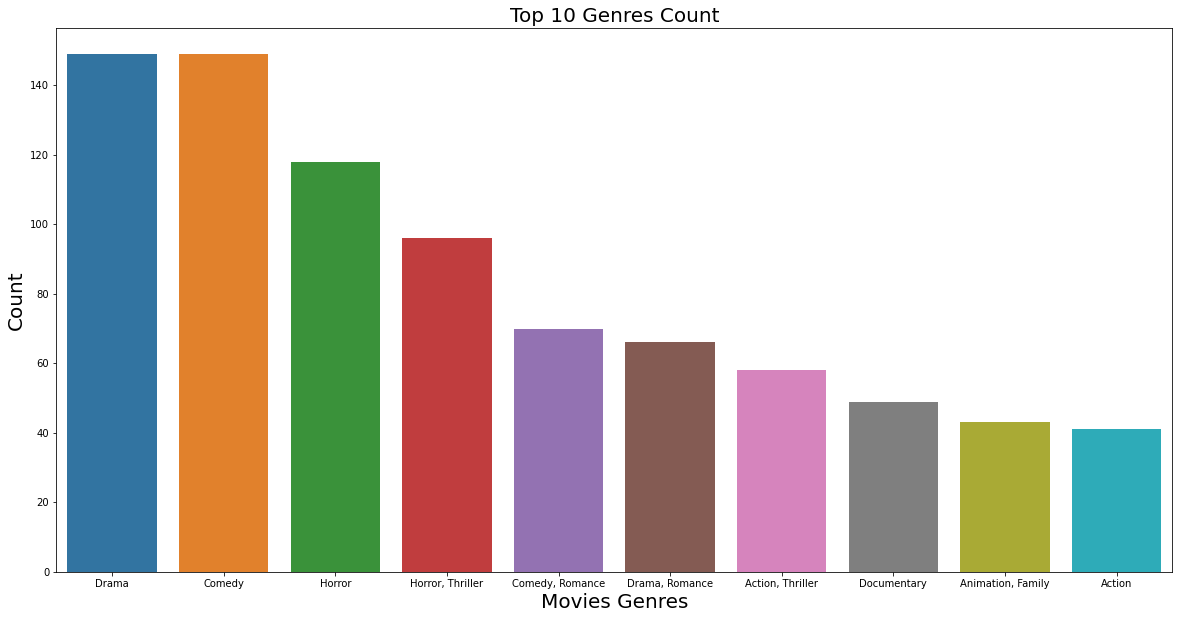

In [130]:
fig=plt.figure(figsize=(20,10))
sns.barplot(x=top_10_genres_counts.index,y=top_10_genres_counts.values)
plt.xlabel('Movies Genres',size=20)
plt.ylabel('Count',size=20)
plt.title("Top 10 Genres Count",size=20)
plt.show()

In [132]:
movie_data.value_counts().head(10)

Name              Rating  Genre                              Release Date  Runtime  Director            
#Alive            73.0    Action, Horror, Thriller           06/24/2020    1h 38m   Cho Il                  1
Sexo Animal       30.0    Drama                              04/06/1983    1h 54m   Fauzi Mansur            1
Sex Drive         63.0    Comedy, Adventure, Romance         10/17/2008    1h 49m   Sean Anders             1
Sex Is Zero       60.0    Comedy, Drama                      12/13/2002    1h 36m   JK Youn                 1
Sex Stories       59.0    Drama                              01/01/1999    0        Matías Cruz             1
Sex Tape          54.0    Comedy                             07/18/2014    1h 37m   Jake Kasdan             1
Sex Weather       60.0    Romance, Drama, Comedy             10/01/2018    1h 30m   Jon García              1
Sex and Lucía     67.0    Drama, Romance                     08/24/2001    2h 8m    Julio Medem             1
Sex and Zen    

In [133]:
movie_data.columns

Index(['Name', 'Rating', 'Genre', 'Release Date', 'Runtime', 'Director'], dtype='object')

In [134]:
max_rating = movie_data.groupby('Director')[['Name','Rating','Genre','Release Date','Runtime']].max().sort_values(by='Rating',ascending=False)
max_rating.reset_index()
max_rating

,Name,Rating,Genre,Release Date,Runtime
Director,,,,,
Carlos Pérez Osorio,The Three Deaths of Marisela Escobedo,91.0,"Documentary, Crime",10/14/2020,1h 49m
Daniel Kwan,Everything Everywhere All at Once,88.0,"Action, Science Fiction, Comedy",04/08/2022,2h 19m
Haruo Sotozaki,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,88.0,"Animation, Action, Adventure, Fantasy",08/13/2021,1h 57m
Sandra Solares,"Ni tuyo, Ni mía",88.0,Drama,08/19/2021,0
Alastair Fothergill,Polar Bear,87.0,Documentary,04/22/2022,1h 24m
...,...,...,...,...,...
Hiroki Kazama,Cherry Magic! THE MOVIE,0.0,"Comedy, Romance",04/08/2022,0
Goro Taniguchi,One Piece Film: Red,0.0,"Animation, Adventure, Action, Fantasy",08/06/2022,0
Christopher Winterbauer,Moonshot,0.0,"Comedy, Romance, Science Fiction",05/05/2022,1h 44m


In [308]:
max_rating.head(20)

,Name,Rating,Genre,Release Date,Runtime
Director,,,,,
Carlos Pérez Osorio,The Three Deaths of Marisela Escobedo,91.0,"Documentary, Crime",10/14/2020,1h 49m
Daniel Kwan,Everything Everywhere All at Once,88.0,"Action, Science Fiction, Comedy",04/08/2022,2h 19m
Haruo Sotozaki,Demon Slayer: Kimetsu no Yaiba Sibling's Bond,88.0,"Animation, Action, Adventure, Fantasy",08/13/2021,1h 57m
Sandra Solares,"Ni tuyo, Ni mía",88.0,Drama,08/19/2021,0
Alastair Fothergill,Polar Bear,87.0,Documentary,04/22/2022,1h 24m
Francis Ford Coppola,The Godfather: Part III,87.0,"Romance, Horror",12/25/1990,3h 22m
Frank Darabont,The Shawshank Redemption,87.0,"Horror, Science Fiction, Thriller",12/10/1999,3h 8m
Aditya Chopra,Dilwale Dulhania Le Jayenge,87.0,"Comedy, Drama, Romance",10/20/1995,3h 10m
Steven Spielberg,West Side Story,86.0,"War, Drama, Action",12/25/2002,3h 15m


In [312]:
px.bar(max_rating.head(20),x='Name',y='Rating',title="Max Rating Top 20 Movies",hover_data=['Release Date'],
       color='Name',labels={'Name': 'Movies'}, height=800)

In [137]:
movie_data['Rating'].max()

91.0

In [139]:
highest_rating_movie=movie_data[movie_data['Rating']==91]
highest_rating_movie

,Name,Rating,Genre,Release Date,Runtime,Director
2456,The Three Deaths of Marisela Escobedo,91.0,"Documentary, Crime",10/14/2020,1h 49m,Carlos Pérez Osorio


In [140]:
movie_data['Rating'].min()

0.0

In [141]:
lowest_rating_movie = movie_data[movie_data['Rating']==0.0]
lowest_rating_movie

,Name,Rating,Genre,Release Date,Runtime,Director
85,Doctor Strange in the Multiverse of Madness,0.0,"Fantasy, Action, Adventure",05/06/2022,2h 6m,Stan Lee
113,Moonshot,0.0,"Comedy, Romance, Science Fiction",05/05/2022,1h 44m,Christopher Winterbauer
141,¿Y cómo es él?,0.0,Comedy,04/07/2022,1h 35m,Ariel Winograd
160,Dragon Ball Super: Super Hero,0.0,"Animation, Science Fiction, Action",06/11/2022,0,Akira Toriyama
231,After Ever Happy,0.0,Romance,08/25/2022,1h 59m,Castille Landon
286,Thor: Love and Thunder,0.0,"Adventure, Fantasy, Comedy",07/08/2022,0,Taika Waititi
354,Jurassic World Dominion,0.0,"Adventure, Action, Science Fiction, Thriller",06/10/2022,2h 26m,Colin Trevorrow
845,Minions: The Rise of Gru,0.0,"Family, Animation, Action, Adventure, Comedy",07/01/2022,1h 30m,Matt Fogel
932,Top Gun: Maverick,0.0,"Action, Drama",05/27/2022,2h 11m,Jim Cash
996,Miraculous Ladybug & Cat Noir: The Movie,0.0,"Action, Animation, Adventure, Fantasy, Music",08/03/2022,0,Jeremy Zag


In [143]:
movie_data['Rating'].mean()

65.4905

In [144]:
avg_rating = movie_data[(movie_data['Rating']>=65) & (movie_data['Rating']<=66)]
avg_rating

,Name,Rating,Genre,Release Date,Runtime,Director
7,Moonfall,65.0,"Action, Adventure, Science Fiction",02/04/2022,2h 10m,Roland Emmerich
63,Death on the Nile,65.0,"Crime, Drama, Mystery, Thriller",02/11/2022,2h 7m,Kenneth Branagh
66,Pirates of the Caribbean: On Stranger Tides,65.0,"Adventure, Action, Fantasy",05/20/2011,2h 17m,Rob Marshall
79,Sex Appeal,66.0,"Comedy, Romance",01/14/2022,1h 30m,Talia Osteen
115,Pirates of the Caribbean: Dead Men Tell No Tales,66.0,"Adventure, Action, Fantasy",05/26/2017,2h 9m,Terry Rossio
...,...,...,...,...,...,...
3918,Event Horizon,65.0,"Horror, Science Fiction, Mystery",10/24/1997,1h 36m,Paul W. S. Anderson
3923,Lethal Weapon 4,66.0,"Action, Adventure, Comedy, Crime, Thriller",07/10/1998,2h 7m,Shane Black
3949,Crimson Peak,66.0,"Horror, Thriller, Romance, Mystery",10/16/2015,1h 59m,Guillermo del Toro
3975,Joy Ride,65.0,"Mystery, Thriller, Drama",10/05/2001,1h 37m,John Dahl


In [307]:
px.bar(avg_rating.head(10),x='Name',y='Rating',hover_data=['Director'],title = 'Average Rating Top 10 Movies',color='Name',labels={'Name': 'Movies'},height=800)

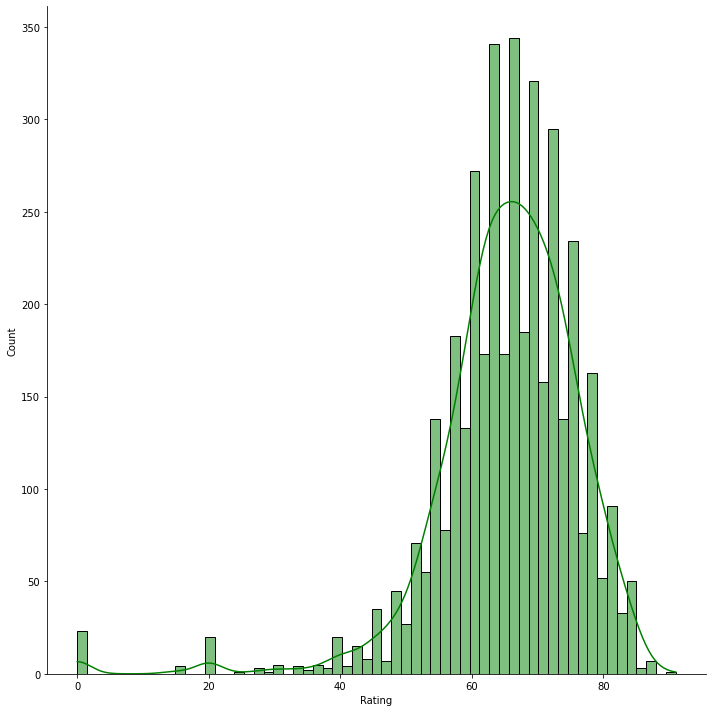

In [149]:
sns.displot(movie_data['Rating'],kde=True,color='green',height=10)

In [150]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          4000 non-null   object 
 1   Rating        4000 non-null   float64
 2   Genre         4000 non-null   object 
 3   Release Date  4000 non-null   object 
 4   Runtime       4000 non-null   object 
 5   Director      4000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 187.6+ KB


In [155]:
movie_data['Release Date']= movie_data['Release Date'].str[0:10]
movie_data['Release Date']

0       03/04/2022
1       12/17/2021
2       03/18/2022
3       03/10/2022
4       04/08/2022
           ...    
3995    02/26/2021
3996    08/25/2011
3997    11/25/2009
3998    08/31/2018
3999    09/09/2020
Name: Release Date, Length: 4000, dtype: object

In [156]:
movie_data['Date'] = pd.to_datetime(movie_data['Release Date'], format= '%m/%d/%Y' )

In [157]:
movie_data['Year']= pd.DatetimeIndex(movie_data['Release Date']).year
movie_data['Month']= pd.DatetimeIndex(movie_data['Release Date']).month
movie_data['Day']= pd.DatetimeIndex(movie_data['Release Date']).day

In [158]:
movie_data

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves,2022-03-04,2022,3,4
1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko,2021-12-17,2021,12,17
2,The Outfit,70.0,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore,2022-03-18,2022,3,18
3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi,2022-03-10,2022,3,10
4,Yaksha: Ruthless Operations,60.0,Action,04/08/2022,2h 5m,Na Hyun,2022-04-08,2022,4,8
...,...,...,...,...,...,...,...,...,...,...
3995,The Girl on the Train,59.0,"Drama, Thriller",02/26/2021,2h 8m,Ribhu Dasgupta,2021-02-26,2021,2,26
3996,Don't Be Afraid of the Dark,57.0,"Fantasy, Horror, Thriller",08/25/2011,1h 39m,Troy Nixey,2011-08-25,2011,8,25
3997,Fantastic Mr. Fox,78.0,"Adventure, Animation, Comedy, Family",11/25/2009,1h 27m,Wes Anderson,2009-11-25,2009,11,25
3998,Kin,62.0,"Science Fiction, Action",08/31/2018,1h 42m,Josh Baker,2018-08-31,2018,8,31


In [289]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          4000 non-null   object        
 1   Rating        4000 non-null   float64       
 2   Genre         4000 non-null   object        
 3   Release Date  4000 non-null   object        
 4   Runtime       4000 non-null   object        
 5   Director      4000 non-null   object        
 6   Date          4000 non-null   datetime64[ns]
 7   Year          4000 non-null   int64         
 8   Month         4000 non-null   int64         
 9   Day           4000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 312.6+ KB


In [164]:
movie_data['Year'].unique()

array([2022, 2021, 1986, 2020, 2011, 2006, 2003, 2007, 2018, 2016, 2017,
       2009, 2010, 2015, 2002, 2012, 2014, 2019, 2005, 2004, 2013, 1995,
       2001, 1994, 1993, 1999, 1998, 2008, 1989, 1997, 1991, 1950, 1987,
       1985, 1990, 2000, 1965, 1992, 1940, 1977, 1967, 1942, 1961, 1941,
       1981, 1951, 1988, 1953, 1972, 1970, 1955, 1956, 1980, 1959, 1939,
       1963, 1974, 1996, 1984, 1969, 1976, 1982, 1983, 1973, 1978, 1979,
       1964, 1971, 1968, 1960, 1947, 1949, 1975, 1931, 1962, 1966, 1945,
       1932, 1952, 1957, 1943, 1954], dtype=int64)

In [237]:
yearly_movies_data=movie_data.groupby(['Year','Name'])[['Rating','Runtime','Director']].max().sort_values(by='Year',ascending=False)
yearly_movies_data

Rating Runtime  \
Year Name                                                                
2022 ¿Y cómo es él?                                        0.0  1h 35m   
     Home Team                                            68.0  1h 35m   
     Heart Shot                                           53.0     19m   
     Harry Potter 20th Anniversary: Return to Hogwarts    79.0  1h 43m   
     Goyo: En Letra de Otro                               20.0     46m   
...                                                        ...     ...   
1940 Pinocchio                                            71.0  1h 28m   
     Gone with the Wind                                   80.0  3h 53m   
1939 The Wizard of Oz                                     76.0  1h 42m   
1932 Scarface                                             75.0  1h 33m   
1931 Big Man from the North                               47.0      7m   

                                                              Director  
Year Name                                                               
2022 ¿Y cómo es él?                                     Ariel Winograd  
     Home Team                                          Daniel Kinnane  
     Heart Shot                                         Marielle Woods  
     Harry Potter 20th Anniversary: Return to Hogwarts    Joe Pearlman  
     Goyo: En Letra de Otro                                Simón Brand  
...                                                                ...  
1940 Pinocchio                                          Campbell Grant  
     Gone with the Wind                                 Victor Fleming  
1939 The Wizard of Oz                                    L. Frank Baum  
1932 Scarface                                             Howard Hawks  
1931 Big Man from the North                               Rudolf Ising  

[3999 rows x 3 columns]

In [288]:
yearly_movies_data.head(10)

Rating Runtime  \
Year Name                                                                
2022 ¿Y cómo es él?                                        0.0  1h 35m   
     Home Team                                            68.0  1h 35m   
     Heart Shot                                           53.0     19m   
     Harry Potter 20th Anniversary: Return to Hogwarts    79.0  1h 43m   
     Goyo: En Letra de Otro                               20.0     46m   
     Gold                                                 64.0  1h 37m   
     Fresh                                                69.0  1h 54m   
     Four to Dinner                                       63.0  1h 44m   
     Forgive Us Our Trespasses                            63.0     14m   
     Forever Out of My League                             55.0  1h 44m   

                                                                      Director  
Year Name                                                                       
2022 ¿Y cómo es él?                                             Ariel Winograd  
     Home Team                                                  Daniel Kinnane  
     Heart Shot                                                 Marielle Woods  
     Harry Potter 20th Anniversary: Return to Hogwarts            Joe Pearlman  
     Goyo: En Letra de Otro                                        Simón Brand  
     Gold                                                        Anthony Hayes  
     Fresh                                                           Mimi Cave  
     Four to Dinner                                     Alessio Maria Federici  
     Forgive Us Our Trespasses                                    Ashley Eakin  
     Forever Out of My League                                    Roberto Proia

In [204]:
movies_2022 = movie_data[movie_data['Year']==2022]
movies_2022=movies_2022.sort_values(by='Rating',ascending=False)
movies_2022

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
844,Everything Everywhere All at Once,88.0,"Action, Science Fiction, Comedy",04/08/2022,2h 19m,Daniel Kwan,2022-04-08,2022,4,8
1299,Polar Bear,87.0,Documentary,04/22/2022,1h 24m,Alastair Fothergill,2022-04-22,2022,4,22
1215,K.G.F: Chapter 2,84.0,"Action, Drama",04/14/2022,2h 48m,Prashanth Neel,2022-04-14,2022,4,14
553,Virus:32,83.0,Horror,04/21/2022,1h 30m,Gustavo Hernández,2022-04-21,2022,4,21
1077,My Father's Violin,80.0,"Drama, Music",01/21/2022,1h 52m,Andaç Haznedaroğlu,2022-01-21,2022,1,21
...,...,...,...,...,...,...,...,...,...,...
2830,Puss in Boots: The Last Wish,0.0,"Animation, Adventure, Comedy, Family, Fantasy,...",09/23/2022,0,Joel Crawford,2022-09-23,2022,9,23
1885,Can't Live Without You,0.0,Thriller,06/03/2022,1h 31m,Chus Gutiérrez,2022-06-03,2022,6,3
1948,Constantine: The House of Mystery,0.0,"Fantasy, Animation, Horror, Action",05/03/2022,27m,Alan Moore,2022-05-03,2022,5,3
2117,The Black Phone,0.0,Horror,06/24/2022,1h 42m,Scott Derrickson,2022-06-24,2022,6,24


In [229]:
movies_2022.head(20)

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
844,Everything Everywhere All at Once,88.0,"Action, Science Fiction, Comedy",04/08/2022,2h 19m,Daniel Kwan,2022-04-08,2022,4,8
1299,Polar Bear,87.0,Documentary,04/22/2022,1h 24m,Alastair Fothergill,2022-04-22,2022,4,22
1215,K.G.F: Chapter 2,84.0,"Action, Drama",04/14/2022,2h 48m,Prashanth Neel,2022-04-14,2022,4,14
553,Virus:32,83.0,Horror,04/21/2022,1h 30m,Gustavo Hernández,2022-04-21,2022,4,21
1077,My Father's Violin,80.0,"Drama, Music",01/21/2022,1h 52m,Andaç Haznedaroğlu,2022-01-21,2022,1,21
2607,Jeepers Creepers: Reborn,80.0,"Horror, Thriller",02/17/2022,1h 28m,Victor Salva,2022-02-17,2022,2,17
3297,Bear Witness,80.0,Documentary,04/22/2022,1h 23m,Jeff Wilson,2022-04-22,2022,4,22
327,Harry Potter 20th Anniversary: Return to Hogwarts,79.0,Documentary,01/01/2022,1h 43m,Joe Pearlman,2022-01-01,2022,1,1
0,The Batman,79.0,"Crime, Mystery, Thriller",03/04/2022,2h 56m,Matt Reeves,2022-03-04,2022,3,4
53,The Northman,78.0,"Action, Adventure, Drama, Thriller",04/22/2022,2h 17m,Robert Eggers,2022-04-22,2022,4,22


In [230]:

fig = px.scatter(movies_2022.head(20), x="Name", y="Rating",size="Rating", color="Genre",size_max=10,hover_data=['Director'],
                 labels={'Name':'Movie Name'},title='Top 20 Movies of Year 2022', height=1000)
fig.show()

In [287]:
fig = px.pie(movies_2022, values='Rating', names='Genre',hover_data=['Name'], title='2022 Movies Genre',height=1200)
fig.show()

In [245]:
rating_80_2022 = movie_data[(movie_data['Rating']>=80) & (movie_data['Year']==2022)]
rating_80_2022

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
553,Virus:32,83.0,Horror,04/21/2022,1h 30m,Gustavo Hernández,2022-04-21,2022,4,21
844,Everything Everywhere All at Once,88.0,"Action, Science Fiction, Comedy",04/08/2022,2h 19m,Daniel Kwan,2022-04-08,2022,4,8
1077,My Father's Violin,80.0,"Drama, Music",01/21/2022,1h 52m,Andaç Haznedaroğlu,2022-01-21,2022,1,21
1215,K.G.F: Chapter 2,84.0,"Action, Drama",04/14/2022,2h 48m,Prashanth Neel,2022-04-14,2022,4,14
1299,Polar Bear,87.0,Documentary,04/22/2022,1h 24m,Alastair Fothergill,2022-04-22,2022,4,22
2607,Jeepers Creepers: Reborn,80.0,"Horror, Thriller",02/17/2022,1h 28m,Victor Salva,2022-02-17,2022,2,17
3297,Bear Witness,80.0,Documentary,04/22/2022,1h 23m,Jeff Wilson,2022-04-22,2022,4,22


In [286]:
fig = px.bar(rating_80_2022, x="Name", y="Rating", color="Genre",hover_data=['Director'],
             labels={'Name':'Movies'},title='Movies Release in 2022 with 80+ ratings')
fig.show()

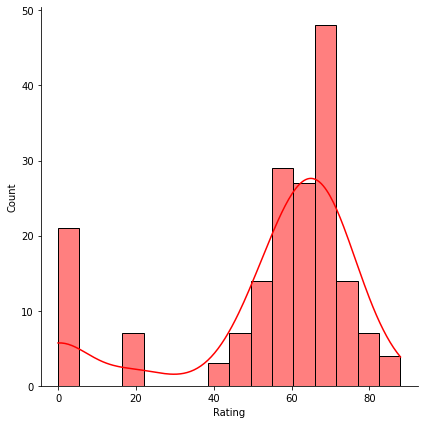

In [295]:
sns.displot(movies_2022['Rating'],kde=True,color='red',height=6)

In [240]:
movies_2021 = movie_data[movie_data['Year']==2021]
movies_2021=movies_2021.sort_values(by='Rating',ascending=False)
movies_2021

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
2958,"Ni tuyo, Ni mía",88.0,Drama,08/19/2021,0,Sandra Solares,2021-08-19,2021,8,19
2227,Impossible Things,86.0,"Family, Drama",06/17/2021,1h 29m,Ernesto Contreras,2021-06-17,2021,6,17
380,Evangelion: 3.0+1.0 Thrice Upon a Time,85.0,"Animation, Action, Science Fiction, Drama",03/08/2021,2h 35m,Hideaki Anno,2021-03-08,2021,3,8
36,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,84.0,"Animation, Action, Adventure, Fantasy",08/13/2021,1h 57m,Haruo Sotozaki,2021-08-13,2021,8,13
676,New Gods: Nezha Reborn,83.0,"Animation, Action, Fantasy",02/12/2021,1h 56m,Zhao Ji,2021-02-12,2021,2,12
...,...,...,...,...,...,...,...,...,...,...
2740,Kimetsu no Yaiba Orchestra Concert,20.0,Music,08/25/2021,1h 54m,Hirofumi Kurita,2021-08-25,2021,8,25
3101,La Bruja,20.0,"Drama, Horror",10/28/2021,0,Ronny A. Sosa,2021-10-28,2021,10,28
2132,La Cantera,20.0,Drama,11/22/2021,1h 35m,Miguel Barreda-Delgado,2021-11-22,2021,11,22
870,Black Coffin,15.0,"Drama, Music, Thriller",02/10/2021,0,F. A. Jiménez,2021-02-10,2021,2,10


In [242]:
fig = px.scatter(movies_2021.head(20), x="Name", y="Rating",size="Rating", color="Genre",size_max=10,hover_data=['Director'],
                 labels={'Name':'Movie Name'},title='Top 20 Movies of Year 2021', height=1000)
fig.show()

In [246]:
rating_80_2021 = movie_data[(movie_data['Rating']>=80) & (movie_data['Year']==2021)]
rating_80_2021

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
1,Spider-Man: No Way Home,81.0,"Action, Adventure, Science Fiction",12/17/2021,2h 28m,Steve Ditko,2021-12-17,2021,12,17
28,Sing 2,81.0,"Animation, Comedy, Family, Music",12/22/2021,1h 50m,Garth Jennings,2021-12-22,2021,12,22
36,Demon Slayer -Kimetsu no Yaiba- The Movie: Mug...,84.0,"Animation, Action, Adventure, Fantasy",08/13/2021,1h 57m,Haruo Sotozaki,2021-08-13,2021,8,13
71,Ron's Gone Wrong,81.0,"Animation, Science Fiction, Family, Comedy",10/22/2021,1h 47m,Sarah Smith,2021-10-22,2021,10,22
75,Luca,80.0,"Animation, Comedy, Family, Fantasy, Adventure",06/17/2021,1h 35m,Enrico Casarosa,2021-06-17,2021,6,17
93,Cruella,82.0,"Comedy, Crime",05/28/2021,2h 14m,Craig Gillespie,2021-05-28,2021,5,28
110,Zack Snyder's Justice League,83.0,"Action, Adventure, Fantasy, Science Fiction",03/18/2021,4h 2m,Zack Snyder,2021-03-18,2021,3,18
112,Finch,81.0,"Science Fiction, Drama, Adventure",11/04/2021,1h 55m,Miguel Sapochnik,2021-11-04,2021,11,4
134,Raya and the Last Dragon,80.0,"Animation, Family, Fantasy, Action, Adventure",03/05/2021,1h 47m,Don Hall,2021-03-05,2021,3,5
140,The Tomorrow War,80.0,"Action, Science Fiction, Adventure",07/02/2021,2h 18m,Chris McKay,2021-07-02,2021,7,2


In [285]:
fig = px.bar(rating_80_2021, x="Name", y="Rating", color="Genre",hover_data=['Director'],
             labels={'Name':'Movies'},title='Movies Release in 2021 with 80+ ratings',height=1000,width=1200)
fig.show()

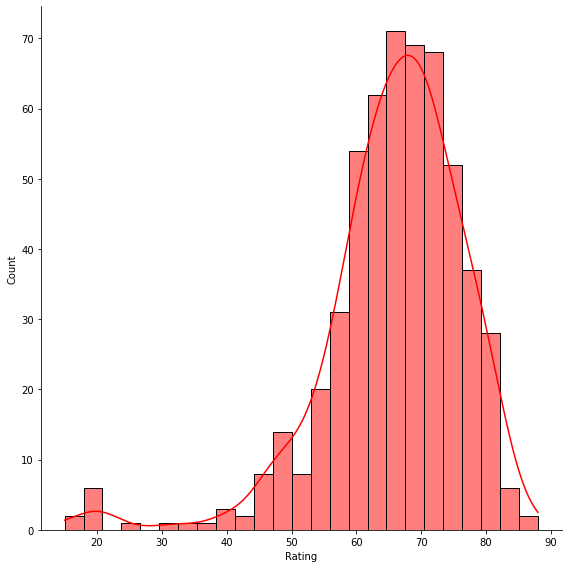

In [306]:
sns.displot(movies_2021['Rating'],kde=True,color='red',height=8)

In [263]:
top_10_genres_counts

Drama                149
Comedy               149
Horror               118
Horror, Thriller      96
Comedy, Romance       70
Drama, Romance        66
Action, Thriller      58
Documentary           49
Animation, Family     43
Action                41
Name: Genre, dtype: int64

In [266]:
drama_2022 = movie_data[(movie_data['Genre'].str.contains('Drama')) & (movie_data['Year']==2022)]
drama_2022

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
2,The Outfit,70.0,"Drama, Thriller, Crime",03/18/2022,1h 45m,Graham Moore,2022-03-18,2022,3,18
23,The In Between,71.0,"Romance, Science Fiction, Drama",02/11/2022,1h 56m,Arie Posin,2022-02-11,2022,2,11
31,Metal Lords,68.0,"Comedy, Drama, Music",04/08/2022,1h 37m,Peter Sollett,2022-04-08,2022,4,8
53,The Northman,78.0,"Action, Adventure, Drama, Thriller",04/22/2022,2h 17m,Robert Eggers,2022-04-22,2022,4,22
59,The House,70.0,"Animation, Drama, Comedy, Horror",01/14/2022,1h 37m,Paloma Baeza,2022-01-14,2022,1,14
60,American Siege,57.0,"Action, Thriller, Crime, Drama",03/31/2022,1h 30m,Edward Drake,2022-03-31,2022,3,31
61,Dancing on Glass,59.0,Drama,04/08/2022,2h 17m,Jota Linares,2022-04-08,2022,4,8
63,Death on the Nile,65.0,"Crime, Drama, Mystery, Thriller",02/11/2022,2h 7m,Kenneth Branagh,2022-02-11,2022,2,11
73,Deep Water,56.0,"Drama, Mystery, Thriller",03/18/2022,1h 56m,Adrian Lyne,2022-03-18,2022,3,18
77,All Hail,62.0,"Comedy, Drama",03/30/2022,1h 58m,Marcos Carnevale,2022-03-30,2022,3,30


In [284]:
fig = px.bar(drama_2022, x="Name", y="Rating", color="Genre",hover_data=['Release Date'],
             labels={'Name':'Movies'},title='All Drama Movies release in 2022',height=1000,width=1200)
fig.show()

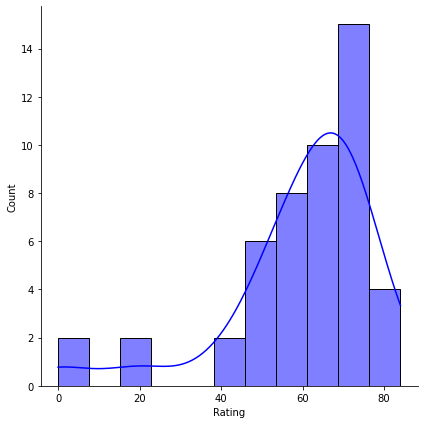

In [305]:
sns.displot(drama_2022['Rating'],kde=True,color='blue',height=6)

In [267]:
comedy_2022 = movie_data[(movie_data['Genre'].str.contains('Comedy')) & (movie_data['Year']==2022)]
comedy_2022

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
3,Turning Red,75.0,"Animation, Family, Comedy, Fantasy",03/10/2022,1h 40m,Domee Shi,2022-03-10,2022,3,10
5,Sonic the Hedgehog 2,76.0,"Action, Science Fiction, Comedy, Family",04/08/2022,2h 2m,Josh Miller,2022-04-08,2022,4,8
11,The Adam Project,70.0,"Action, Adventure, Comedy, Science Fiction",03/11/2022,1h 46m,Shawn Levy,2022-03-11,2022,3,11
17,Hotel Transylvania: Transformania,71.0,"Animation, Family, Fantasy, Comedy, Adventure",02/25/2022,1h 27m,Genndy Tartakovsky,2022-02-25,2022,2,25
25,The Ice Age Adventures of Buck Wild,69.0,"Animation, Comedy, Adventure, Family",01/28/2022,1h 22m,Jim Hecht,2022-01-28,2022,1,28
31,Metal Lords,68.0,"Comedy, Drama, Music",04/08/2022,1h 37m,Peter Sollett,2022-04-08,2022,4,8
47,The Lost City,70.0,"Action, Adventure, Comedy, Romance",03/25/2022,1h 52m,Adam Nee,2022-03-25,2022,3,25
48,Jackass Forever,69.0,"Comedy, Documentary",02/04/2022,1h 36m,Jeff Tremaine,2022-02-04,2022,2,4
50,Looop Lapeta,62.0,"Action, Comedy, Crime",02/04/2022,2h 11m,Aakash Bhatia,2022-02-04,2022,2,4
54,The Bubble,48.0,Comedy,03/25/2022,2h 6m,Judd Apatow,2022-03-25,2022,3,25


In [283]:
fig = px.bar(comedy_2022, x="Name", y="Rating", color="Genre",hover_data=['Release Date'],
             labels={'Name':'Movies'},title='All Comdey Movies release in 2022',height=1000,width=1200)
fig.show()

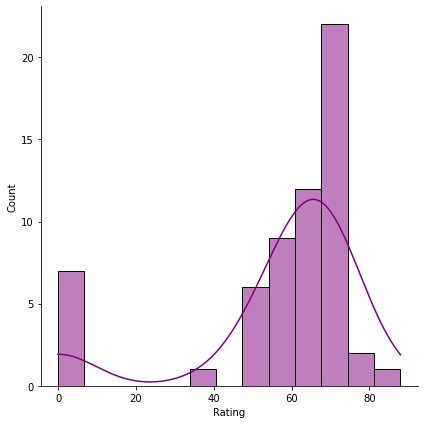

In [304]:
sns.displot(comedy_2022['Rating'],kde=True,color='purple',height=6)

In [274]:
horror_2022 = movie_data[(movie_data['Genre'].str.contains('Horror')) & (movie_data['Year']==2022)]
horror_2022

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
12,No Exit,67.0,"Horror, Thriller",02/25/2022,1h 36m,Damien Power,2022-02-25,2022,2,25
18,The Grandmother,61.0,Horror,01/28/2022,1h 40m,Paco Plaza,2022-01-28,2022,1,28
20,Bull Shark,52.0,Horror,02/05/2022,1h 20m,Brett Bentman,2022-02-05,2022,2,5
40,The Jack in the Box: Awakening,61.0,Horror,02/24/2022,1h 29m,Lawrence Fowler,2022-02-24,2022,2,24
44,Scream,68.0,"Horror, Mystery, Thriller",01/14/2022,1h 54m,Kevin Williamson,2022-01-14,2022,1,14
56,Texas Chainsaw Massacre,51.0,"Horror, Thriller",02/18/2022,1h 23m,Tobe Hooper,2022-02-18,2022,2,18
59,The House,70.0,"Animation, Drama, Comedy, Horror",01/14/2022,1h 37m,Paloma Baeza,2022-01-14,2022,1,14
76,Echoes of a Crime,70.0,"Thriller, Horror",01/27/2022,0,Cristian Bernard,2022-01-27,2022,1,27
88,The Hunting,52.0,Horror,01/21/2022,1h 31m,Mark Andrew Hamer,2022-01-21,2022,1,21
122,The Exorcism of God,66.0,Horror,02/10/2022,1h 38m,Alejandro Hidalgo,2022-02-10,2022,2,10


In [282]:
fig = px.bar(horror_2022, x="Name", y="Rating", color="Genre",hover_data=['Release Date'],
             labels={'Name':'Movies'},title='All Horror Movies release in 2022',height=1000,width=1200)
fig.show()

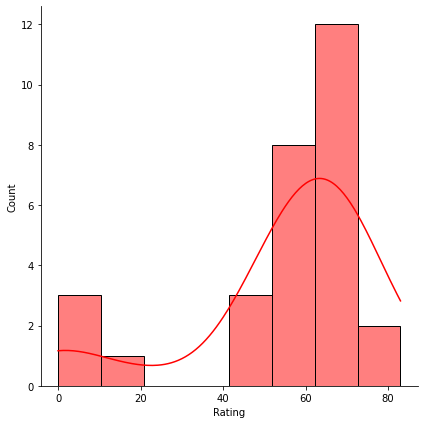

In [300]:
sns.displot(horror_2022['Rating'],kde=True,color='red',height=6)

In [276]:
horror_thriller_2022 = movie_data[(movie_data['Genre'].str.contains('Horror, Thriller')) & (movie_data['Year']==2022)]
horror_thriller_2022

,Name,Rating,Genre,Release Date,Runtime,Director,Date,Year,Month,Day
12,No Exit,67.0,"Horror, Thriller",02/25/2022,1h 36m,Damien Power,2022-02-25,2022,2,25
56,Texas Chainsaw Massacre,51.0,"Horror, Thriller",02/18/2022,1h 23m,Tobe Hooper,2022-02-18,2022,2,18
503,Choose or Die,52.0,"Horror, Thriller, Drama",04/15/2022,1h 25m,Toby Meakins,2022-04-15,2022,4,15
1682,The Legend of La Llorona,56.0,"Horror, Thriller",01/07/2022,1h 38m,Patricia Harris Seeley,2022-01-07,2022,1,7
2607,Jeepers Creepers: Reborn,80.0,"Horror, Thriller",02/17/2022,1h 28m,Victor Salva,2022-02-17,2022,2,17


In [281]:
fig = px.bar(horror_thriller_2022, x="Name", y="Rating", color="Genre",hover_data=['Release Date'],labels={'Name':'Movies'},
             title='All Horror, Thriller Movies release in 2022')
fig.show()

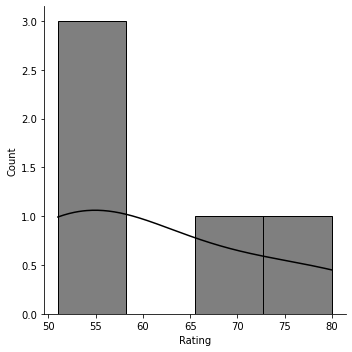

In [302]:
sns.displot(horror_thriller_2022['Rating'],kde=True,color='k')